In [1]:
import pandas as pd

df = pd.read_pickle('C:/Users/Rafael/OneDrive/Documentos/TCC Rafaela/Dados/Pickle/cancer_mama_regiao_sudeste_sem_nulos.pickle')

In [7]:
print(df.columns)

Index(['AP_MVM', 'AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_TPATEN', 'AP_TPAPAC', 'AP_MOTSAI', 'AP_OBITO', 'AP_ENCERR',
       'AP_PERMAN', 'AP_ALTA', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDPRI',
       'AP_CIDSEC', 'AQ_LINFIN', 'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_DTIDEN',
       'AQ_TRANTE', 'AQ_CONTTR', 'AQ_TOTMPL', 'AQ_TOTMAU',
       'esquema_terapeutico', 'Tempo_Atual_1', 'Tempo_1_2', 'Tempo_2_3',
       'Tempo_1_3', 'Mudanca_de_Diagnostico_1', 'Mudanca_de_Diagnostico_2',
       'Mudanca_de_Diagnostico_3', 'Numero_de_Tratamentos_Anteriores',
       'Numero_de_Diagnosticos_Diferentes', 'Tem_Causas_Associadas',
       'Tem_Causas_Secundaria'],
      dtype='object')


In [2]:
# Remover duplicatas com base no chave primária
df_unico = df.drop_duplicates(subset='AP_CNSPCN')

# Contar a quantidade de pacientes únicos
quantidade_pacientes_unicos = len(df_unico)

# Exibir o resultado
print(f'Quantidade de pacientes únicos: {quantidade_pacientes_unicos}')

Quantidade de pacientes únicos: 374349


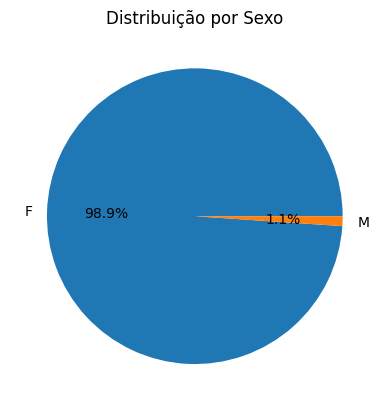

In [9]:
import matplotlib.pyplot as plt

# Gerar o gráfico de pizza com as porcentagens
sexo_porcentagem = df_unico['AP_SEXO'].value_counts(normalize=True) * 100
sexo_porcentagem.plot(kind='pie', autopct='%1.1f%%', title='Distribuição por Sexo')

# Exibir o gráfico
plt.ylabel('')  # Remove a legenda do eixo Y, já que não é necessária no gráfico de pizza
plt.show()

In [15]:
# Dicionário de mapeamento de CID para doenças (exemplo)
cid_dict = {
    'C500':	'Neoplasia maligna do mamilo e aréola',	
    'C501':	'Neoplasia maligna da porção central da mama',
    'C502':'Neoplasia maligna do quadrante superior interno da mama',	
    'C503':'Neoplasia maligna do quadrante inferior interno da mama',	
    'C504':'Neoplasia maligna do quadrante superior externo da mama',	
    'C505':'Neoplasia maligna do quadrante inferior externo da mama',	
    'C506':'Neoplasia maligna da porção axilar da mama',	
    'C508':'Neoplasia maligna da mama com lesão invasiva',	
    'C509':'Neoplasia maligna da mama, não especificada',
    'C50':	'Neoplasia Maligna da Mama'
}

# Substituir os CIDs pelos nomes das doenças diretamente na coluna 'AP_CIDPRI'
df['AP_CIDPRI'] = df['AP_CIDPRI'].replace(cid_dict)


print(df['AP_CIDPRI'].head(5))

7     Neoplasia maligna da mama, não especificada
12    Neoplasia maligna da mama, não especificada
13    Neoplasia maligna da mama, não especificada
15    Neoplasia maligna da mama, não especificada
23    Neoplasia maligna da mama, não especificada
Name: AP_CIDPRI, dtype: object


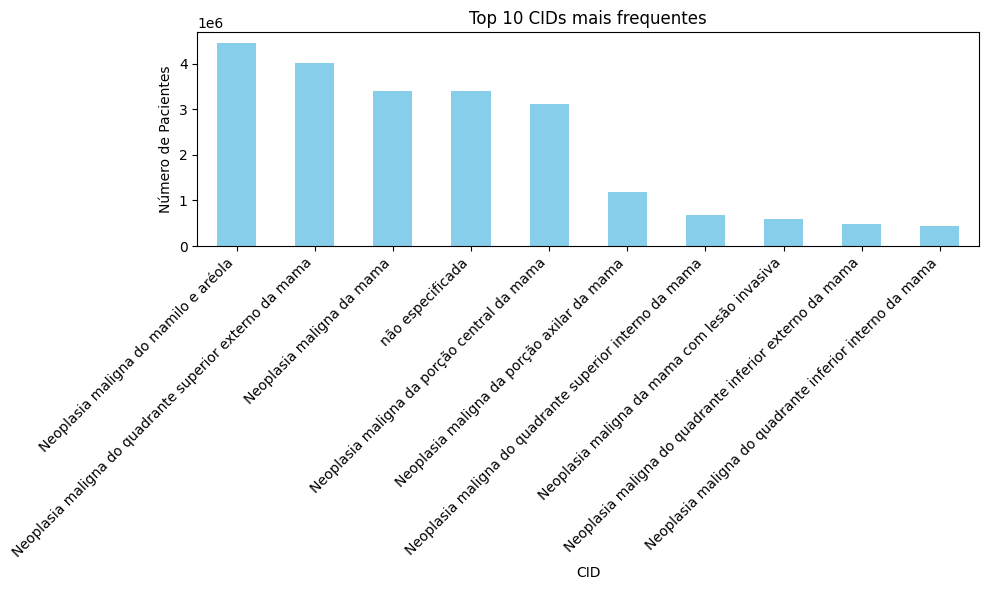

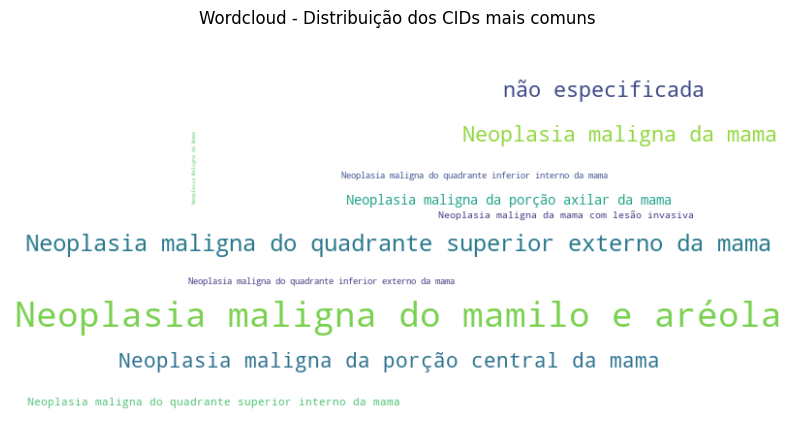

In [18]:
from wordcloud import WordCloud
# Manter os CIDs de cada paciente, mas garantir que cada paciente seja contado apenas uma vez
# Agrupar os dados por e combinar os CIDs (no caso de múltiplos CIDs por paciente)
df_unico_cid = df.groupby('AP_CNSPCN')['AP_CIDPRI'].apply(lambda x: ', '.join(x)).reset_index()

# Contagem dos CIDs mais comuns
cid_contagem = df_unico_cid['AP_CIDPRI'].str.split(', ').explode().value_counts()

# Gráfico de barras para mostrar os CIDs mais frequentes
plt.figure(figsize=(10, 6))
cid_contagem.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 CIDs mais frequentes')
plt.xlabel('CID')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotacionando os rótulos para evitar sobreposição e ajustando o tamanho da fonte
plt.tight_layout()  # Ajuste para evitar corte de rótulos
plt.show()

# Gerar Wordcloud para visualizar as categorias mais comuns de CIDs
wordcloud = WordCloud(width=800, height=400, 
                    background_color='white',
                    max_font_size=100,  # Aumenta o tamanho máximo das fontes
                    font_step=2).generate_from_frequencies(cid_contagem)

# Exibir a Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud - Distribuição dos CIDs mais comuns')
plt.axis('off')  # Remove os eixos
plt.show()

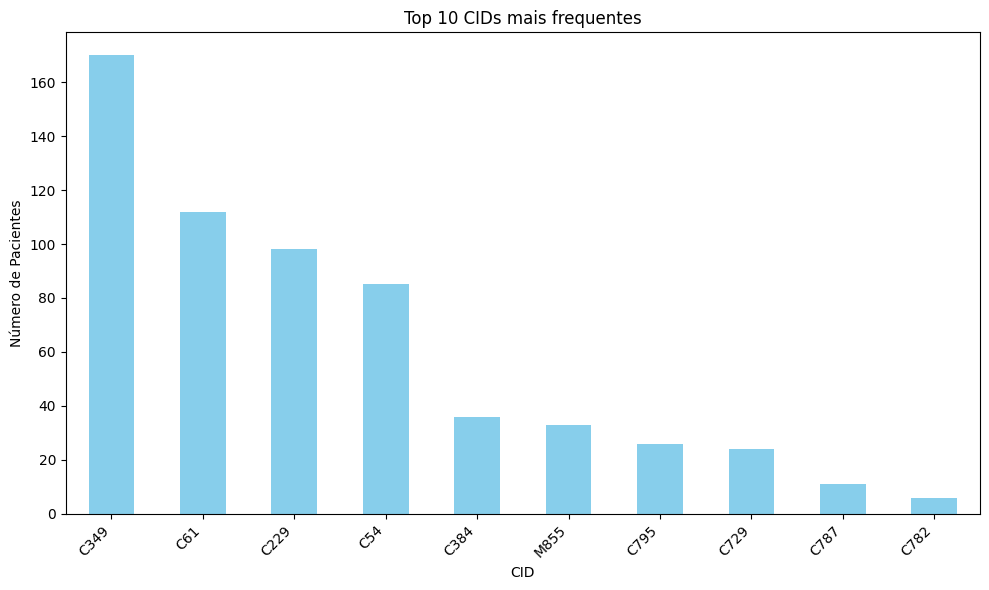

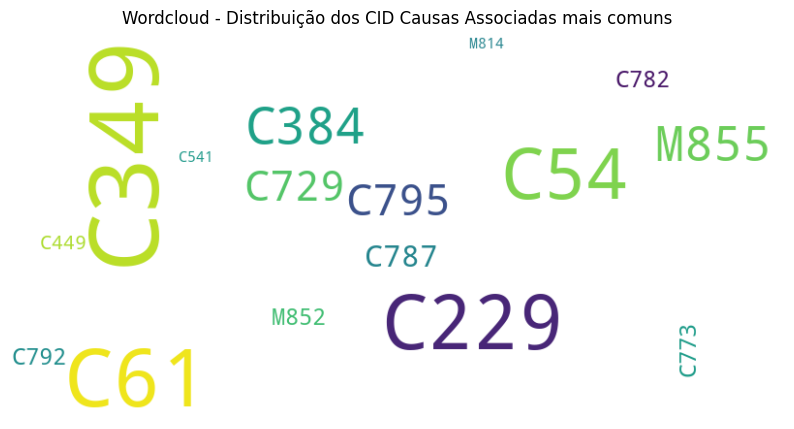

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Passo 1: Garantir que os valores da coluna 'AP_CIDCAS' sejam strings
df['AP_CIDCAS'] = df['AP_CIDCAS'].astype(str)

# Manter os CIDs de cada paciente, mas garantir que cada paciente seja contado apenas uma vez
# Agrupar os dados por e combinar os CIDs (no caso de múltiplos CIDs por paciente)
df_unico_cid = df.groupby('AP_CNSPCN')['AP_CIDCAS'].apply(lambda x: ', '.join(x)).reset_index()

# Contagem dos CIDs mais comuns
cid_contagem = df_unico_cid['AP_CIDCAS'].str.split(', ').explode().value_counts()


# Filtrando as que contêm no nome
cid_contagem = cid_contagem[~cid_contagem.index.str.contains('0000|0')]

# Gráfico de barras para mostrar os CIDs mais frequentes
plt.figure(figsize=(10, 6))
cid_contagem.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 CIDs Causas Associadas mais frequentes')
plt.xlabel('CID')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotacionando os rótulos para evitar sobreposição e ajustando o tamanho da fonte
plt.tight_layout()  # Ajuste para evitar corte de rótulos
plt.show()

# Gerar Wordcloud para visualizar as categorias mais comuns de CIDs
wordcloud = WordCloud(width=800, height=400, 
                    background_color='white',
                    max_font_size=100,  # Aumenta o tamanho máximo das fontes
                    font_step=2).generate_from_frequencies(cid_contagem)

# Exibir a Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud - Distribuição dos CID Causas Associadas mais comuns')
plt.axis('off')  # Remove os eixos
plt.show()

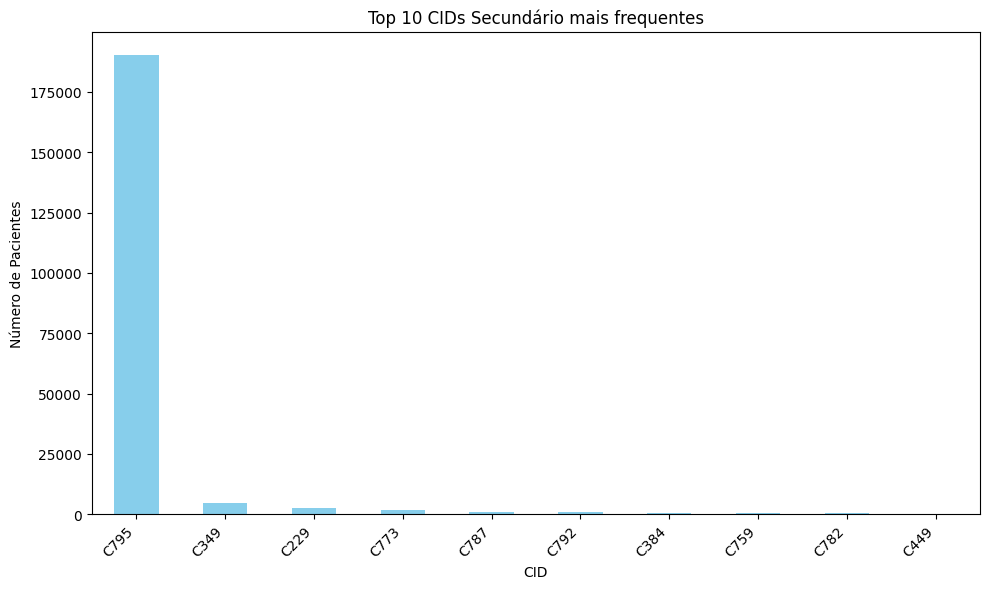

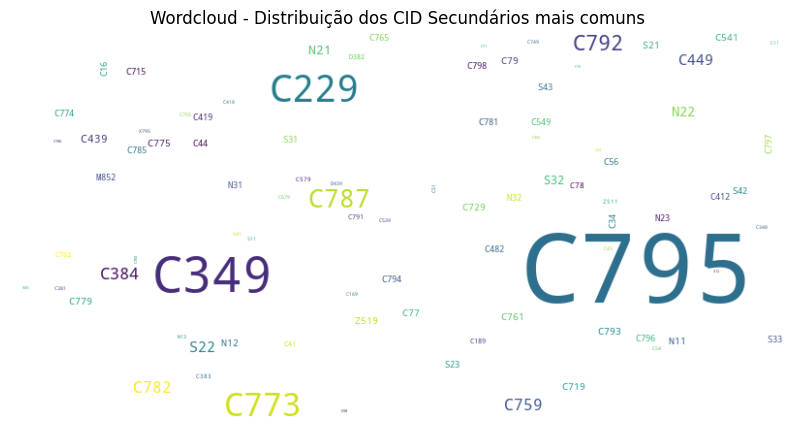

In [7]:


# Passo 1: Garantir que os valores da coluna 'AP_CIDSEC' sejam strings
df['AP_CIDSEC'] = df['AP_CIDSEC'].astype(str)

# Manter os CIDs de cada paciente, mas garantir que cada paciente seja contado apenas uma vez
# Agrupar os dados por e combinar os CIDs (no caso de múltiplos CIDs por paciente)
df_unico_cid = df.groupby('AP_CNSPCN')['AP_CIDSEC'].apply(lambda x: ', '.join(x)).reset_index()

# Contagem dos CIDs mais comuns
cid_contagem = df_unico_cid['AP_CIDSEC'].str.split(', ').explode().value_counts()


# Filtrando as que contêm no nome
cid_contagem = cid_contagem[~cid_contagem.index.str.contains('0000|0')]

# Gráfico de barras para mostrar os CIDs mais frequentes
plt.figure(figsize=(10, 6))
cid_contagem.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 CIDs Secundário mais frequentes')
plt.xlabel('CID')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotacionando os rótulos para evitar sobreposição e ajustando o tamanho da fonte
plt.tight_layout()  # Ajuste para evitar corte de rótulos
plt.show()

# Gerar Wordcloud para visualizar as categorias mais comuns de CIDs
wordcloud = WordCloud(width=800, height=400, 
                    background_color='white',
                    max_font_size=100,  # Aumenta o tamanho máximo das fontes
                    font_step=2).generate_from_frequencies(cid_contagem)

# Exibir a Wordcloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud - Distribuição dos CID Secundários mais comuns')
plt.axis('off')  # Remove os eixos
plt.show()

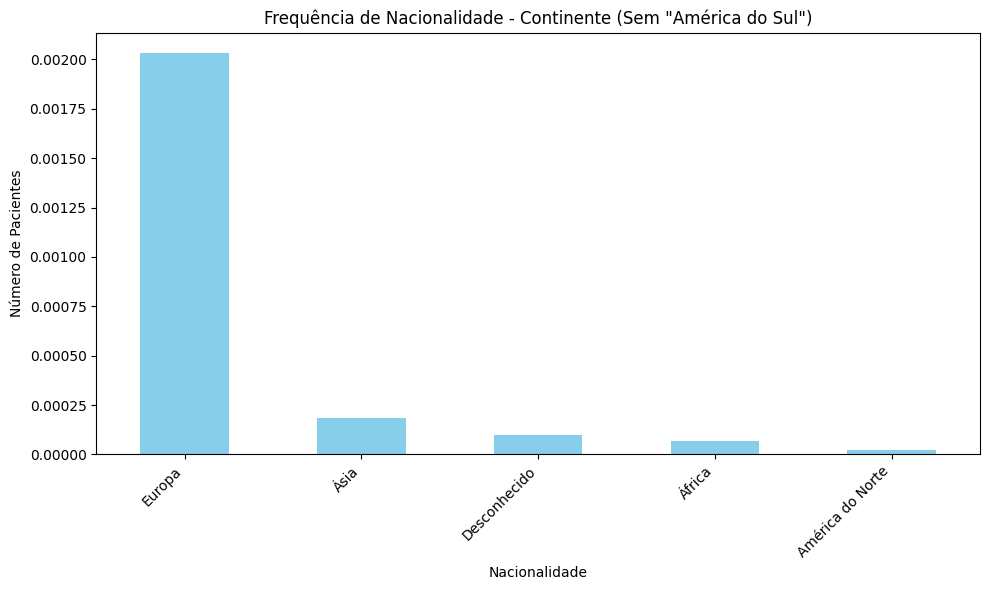

In [ ]:
count_nacionalidade = df_unico['AP_UFNACIO'].value_counts(normalize=True)


# Filtrando as nacionalidades que contêm "América do Sul" no nome
count_nacionalidade_filtered = count_nacionalidade[~count_nacionalidade.index.str.contains("América do Sul")]

# Gráfico de barras para mostrar as nacionalidades mais frequentes, excluindo "América do Sul"
plt.figure(figsize=(10, 6))

# Plotando as 5 nacionalidades mais frequentes
count_nacionalidade_filtered.head(5).plot(kind='bar', color='skyblue')

# Título e rótulos
plt.title('5 Mais Frequentes de Nacionalidade - Continente (Sem "América do Sul")')
plt.xlabel('Nacionalidade')
plt.ylabel('Número de Pacientes')

# Rotacionar rótulos e ajustar o tamanho da fonte
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajuste do layout para evitar o corte dos rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()



In [32]:
# Dicionário de mapeamento de CID para doenças (exemplo)
etnia_dict = {
    '1':'Branca',	
    '2':'Preta',
    '3':'Parda',	
    '4':'Amarela',	
    '5':'Indígena',	
    '99':'Sem informação'
}
# Converter os valores da coluna para string
df_unico['AP_RACACOR'] = df_unico['AP_RACACOR'].astype(str)
                                           
# Substituir os CIDs pelos nomes das doenças diretamente na coluna 'AP_RACACOR'
df_unico['AP_RACACOR'] = df_unico['AP_RACACOR'].replace(etnia_dict)

print(df['AP_RACACOR'].head(5))

7     Sem informação
12    Sem informação
13    Sem informação
15             Parda
23    Sem informação
Name: AP_RACACOR, dtype: object


C:\Users\Rafael\AppData\Local\Temp\ipykernel_10188\3394591561.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['AP_RACACOR'] = df_unico['AP_RACACOR'].astype(str)
C:\Users\Rafael\AppData\Local\Temp\ipykernel_10188\3394591561.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['AP_RACACOR'] = df_unico['AP_RACACOR'].replace(etnia_dict)


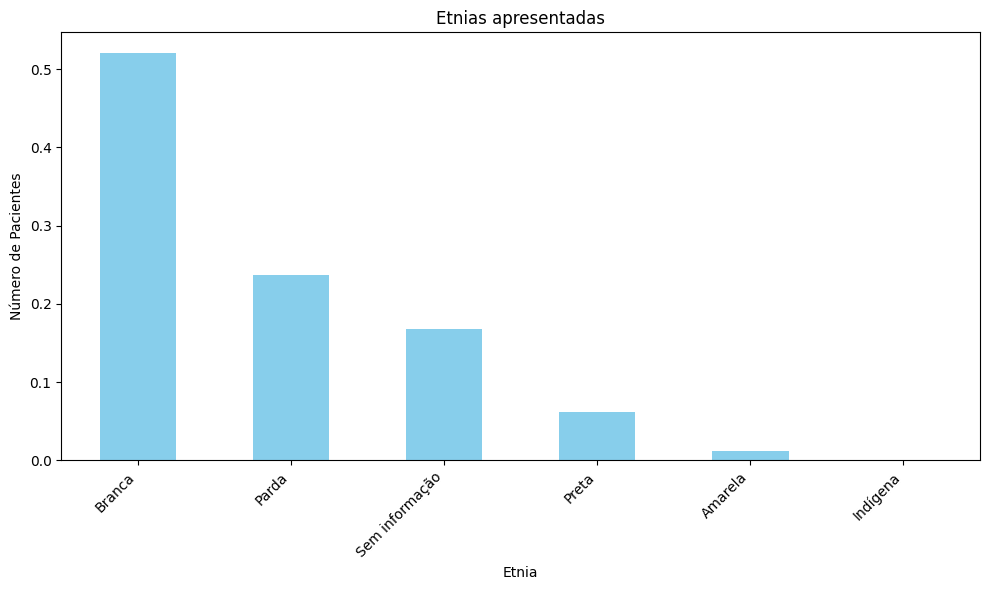

In [34]:
count_etnia = df_unico['AP_RACACOR'].value_counts(normalize=True)

# Gráfico de barras para mostrar as nacionalidades mais frequentes, excluindo "América do Sul"
plt.figure(figsize=(10, 6))

# Plotando as 5 nacionalidades mais frequentes
count_etnia.head(6).plot(kind='bar', color='skyblue')

# Título e rótulos
plt.title('Etnias apresentadas')
plt.xlabel('Etnia')
plt.ylabel('Número de Pacientes')

# Rotacionar rótulos e ajustar o tamanho da fonte
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajuste do layout para evitar o corte dos rótulos
plt.tight_layout()

# Exibir o gráfico
plt.show()

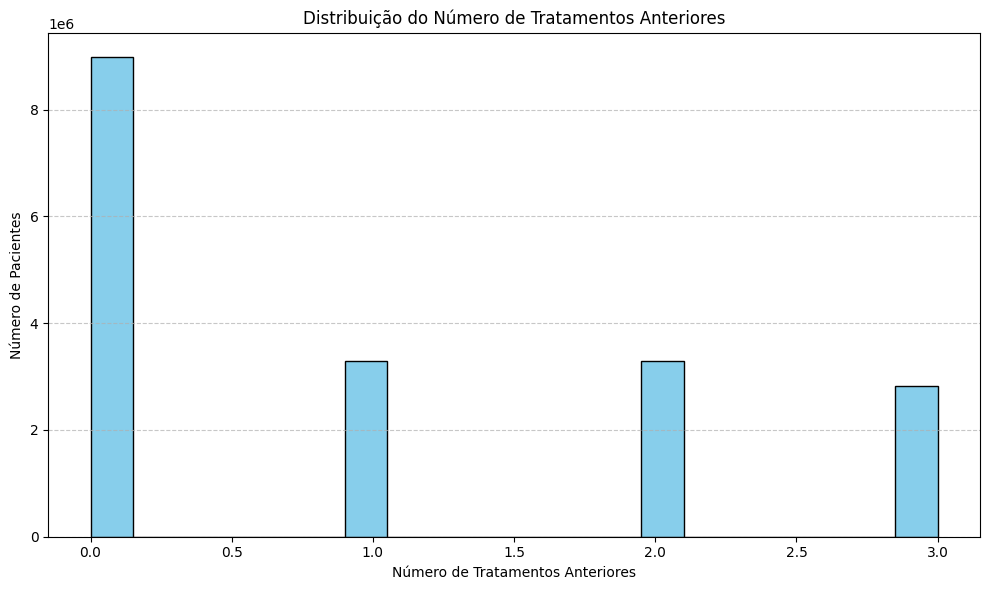

In [13]:
# Garantir que a coluna 'Numero_de_Tratamentos_Anteriores' seja tratada como numérica
df['Numero_de_Tratamentos_Anteriores'] = pd.to_numeric(df['Numero_de_Tratamentos_Anteriores'], errors='coerce')

# Passo 1: Plotar o histograma
plt.figure(figsize=(10, 6))
plt.hist(df['Numero_de_Tratamentos_Anteriores'].dropna(), bins=20, color='skyblue', edgecolor='black')

# Passo 2: Personalizar o gráfico
plt.title('Distribuição do Número de Tratamentos Anteriores')
plt.xlabel('Número de Tratamentos Anteriores')
plt.ylabel('Número de Pacientes')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

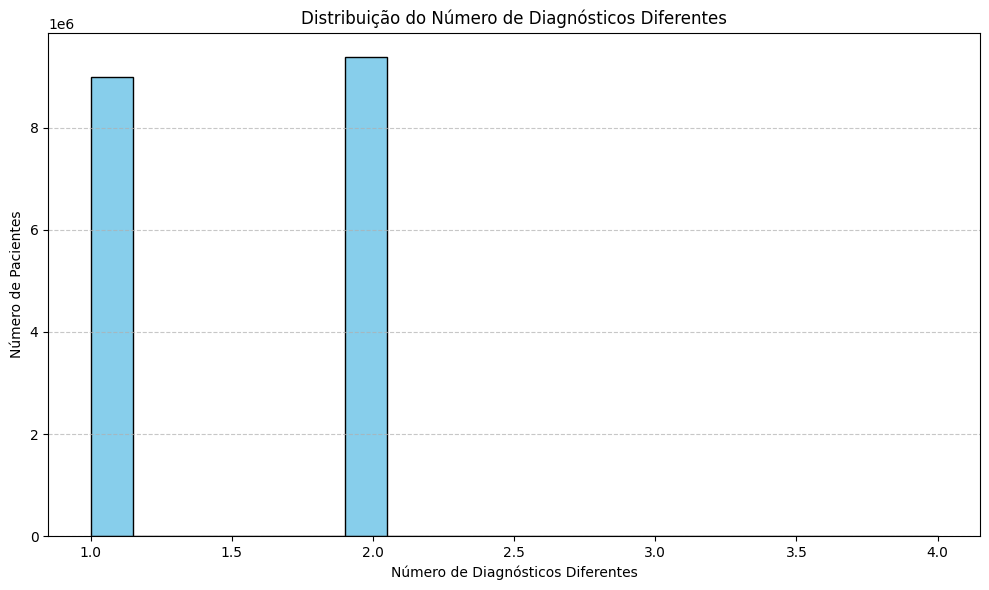

In [14]:
# Garantir que a coluna 'Numero_de_Diagnosticos_Diferentes' seja tratada como numérica
df['Numero_de_Diagnosticos_Diferentes'] = pd.to_numeric(df['Numero_de_Diagnosticos_Diferentes'], errors='coerce')

# Passo 1: Plotar o histograma
plt.figure(figsize=(10, 6))
plt.hist(df['Numero_de_Diagnosticos_Diferentes'].dropna(), bins=20, color='skyblue', edgecolor='black')

# Passo 2: Personalizar o gráfico
plt.title('Distribuição do Número de Diagnósticos Diferentes')
plt.xlabel('Número de Diagnósticos Diferentes')
plt.ylabel('Número de Pacientes')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [18]:
# Calcular as estatísticas descritivas da coluna 'AP_NUIDADE' (idade)
estatisticas_idade = df['AP_NUIDADE'].describe()

# Exibir as estatísticas descritivas
print(estatisticas_idade)

count    1.839328e+07
mean     5.923375e+01
std      1.274022e+01
min      0.000000e+00
25%      5.000000e+01
50%      5.900000e+01
75%      6.800000e+01
max      9.900000e+01
Name: AP_NUIDADE, dtype: float64


In [22]:
# Remover duplicados para garantir que cada paciente seja contado apenas uma vez
df_unico = df.drop_duplicates(subset=['AP_CNSPCN'])  # Substitua 'AP_CNSPCN' pelo identificador único do paciente

# Definir as faixas etárias
faixas_etarias = [0, 18, 35, 50, 65, 100]
rótulos_faixas = ['0-18', '19-35', '36-50', '51-65', '66+']

# Criar uma nova coluna 'Faixa_Etaria' para categorizar os pacientes
df_unico['Faixa_Etaria'] = pd.cut(df_unico['AP_NUIDADE'], bins=faixas_etarias, labels=rótulos_faixas, right=False)

# Contar a quantidade de pacientes únicos em cada faixa etária
faixa_etaria_count = df_unico['Faixa_Etaria'].value_counts()

# Exibir a contagem das faixas etárias
print(faixa_etaria_count)

Faixa_Etaria
51-65    151687
66+      112841
36-50     97351
19-35     12405
0-18         65
Name: count, dtype: int64


C:\Users\Rafael\AppData\Local\Temp\ipykernel_6148\2023915613.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unico['Faixa_Etaria'] = pd.cut(df_unico['AP_NUIDADE'], bins=faixas_etarias, labels=rótulos_faixas, right=False)


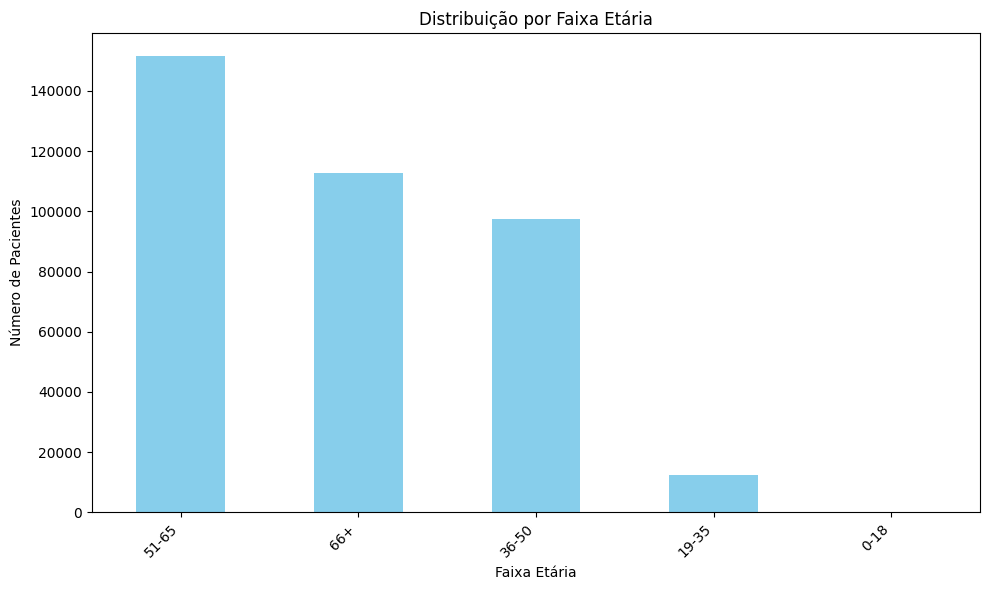

In [23]:
# Gráfico de barras para mostrar a distribuição das faixas etárias
plt.figure(figsize=(10, 6))
faixa_etaria_count.plot(kind='bar', color='skyblue')
plt.title('Distribuição por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajustando o tamanho da fonte
plt.tight_layout()  # Ajuste para evitar corte de rótulos
plt.show()


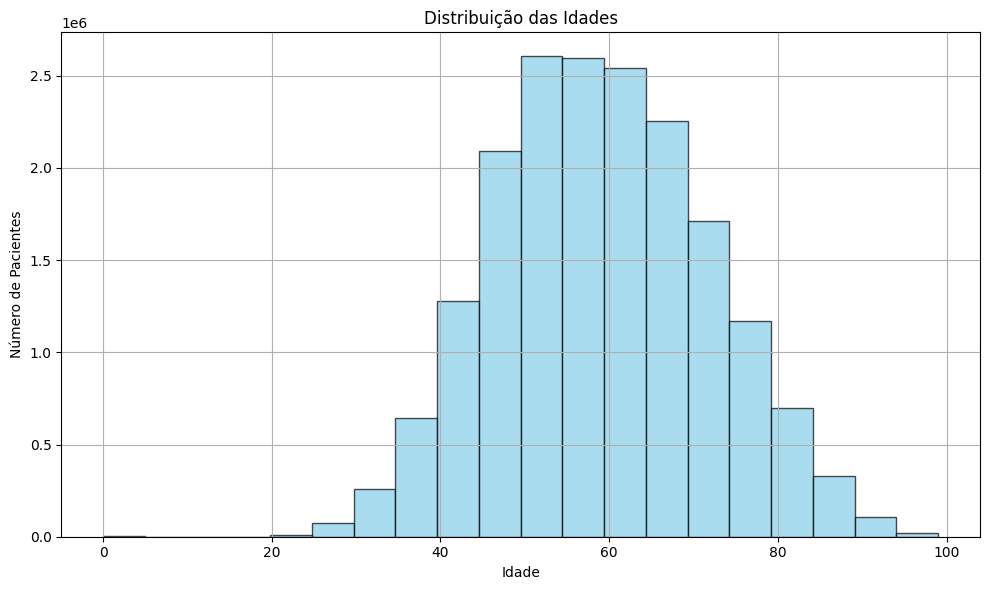

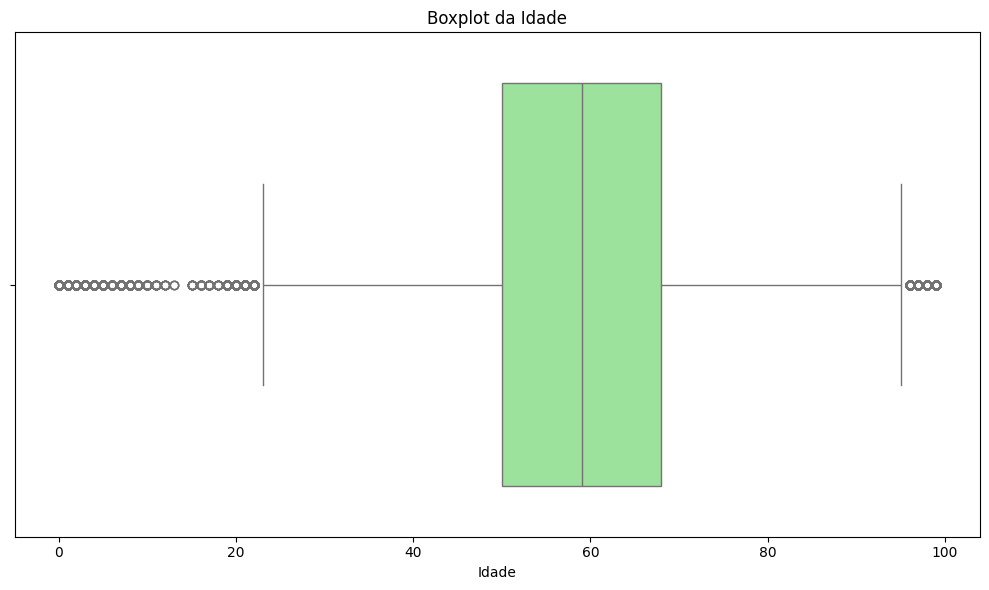

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 1: Histograma para a Distribuição de Idades
plt.figure(figsize=(10, 6))
plt.hist(df['AP_NUIDADE'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.grid(True)
plt.tight_layout()
plt.show()

# Passo 2: Boxplot para Identificar a Mediana e Dispersão das Idades
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AP_NUIDADE'], color='lightgreen')
plt.title('Boxplot da Idade')
plt.xlabel('Idade')
plt.tight_layout()
plt.show()


In [37]:
# Verificar os valores únicos na coluna 'AP_RACACOR'
valores_unicos = df['AP_PRIPAL'].unique()


# Exibir os valores únicos
print(valores_unicos)

[304050121.0 304050040.0 304020346.0 304050105.0 304050113.0 304020141.0
 304020338.0 304020133.0 304040029.0 304050067.0 304050083.0 304050091.0
 304050148.0 304050245.0 304050130.0 304040037.0 304020354.0 304050075.0
 304050059.0 'Desconhecido' 304050300.0 304050318.0 304050288.0
 304050270.0 304050261.0 304040185.0 304050296.0 304020419.0 304020427.0
 304040193.0 304020435.0 304020443.0 304060020.0 304020273.0 304020184.0
 304080071.0 304040045.0 304020060.0 304050024.0 304020079.0 304020036.0
 304080055.0 304020010.0 304020028.0 304050202.0 304020052.0 304070017.0
 304040142.0 304020214.0 304050172.0 304020281.0 304050032.0 304030163.0
 304030031.0 304020249.0 304030155.0 304060119.0 304020109.0 304020290.0
 304020095.0 304050199.0 304060160.0 304020044.0 304020206.0 304030040.0
 304060194.0 304040070.0 304020125.0 304020230.0 304020168.0 304040100.0
 304040061.0 304060186.0 304040010.0 304020257.0 304030180.0 304040134.0
 304020176.0 304020265.0 304060135.0 304060089.0 304020222.0